In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
data = pd.read_csv('C:/Users/Andrew/Downloads/MBG.DE.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654
1,2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262
2,2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396
3,2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618
4,2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070


In [5]:
data.set_index('Date', inplace=True)

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654
2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262
2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396
2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618
2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-24,74.150002,74.440002,73.769997,74.019997,74.019997,2223226
2024-04-25,74.360001,74.360001,72.360001,73.220001,73.220001,2689932
2024-04-26,73.639999,74.790001,73.260002,74.360001,74.360001,2632815
2024-04-29,75.000000,75.279999,74.519997,74.790001,74.790001,2456200
2024-04-30,73.209999,73.790001,70.410004,70.940002,70.940002,8393648


This is Mercedes Stock Price from 2020-01-02 to 2024-04-30

In [9]:
pd.to_datetime(data.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=1105, freq=None)

In [7]:
#data = data.sort_values(by='Date')

In [10]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 2020-01-02 to 2024-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1105 non-null   float64
 1   High       1105 non-null   float64
 2   Low        1105 non-null   float64
 3   Close      1105 non-null   float64
 4   Adj Close  1105 non-null   float64
 5   Volume     1105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.4+ KB


# Data Visualization

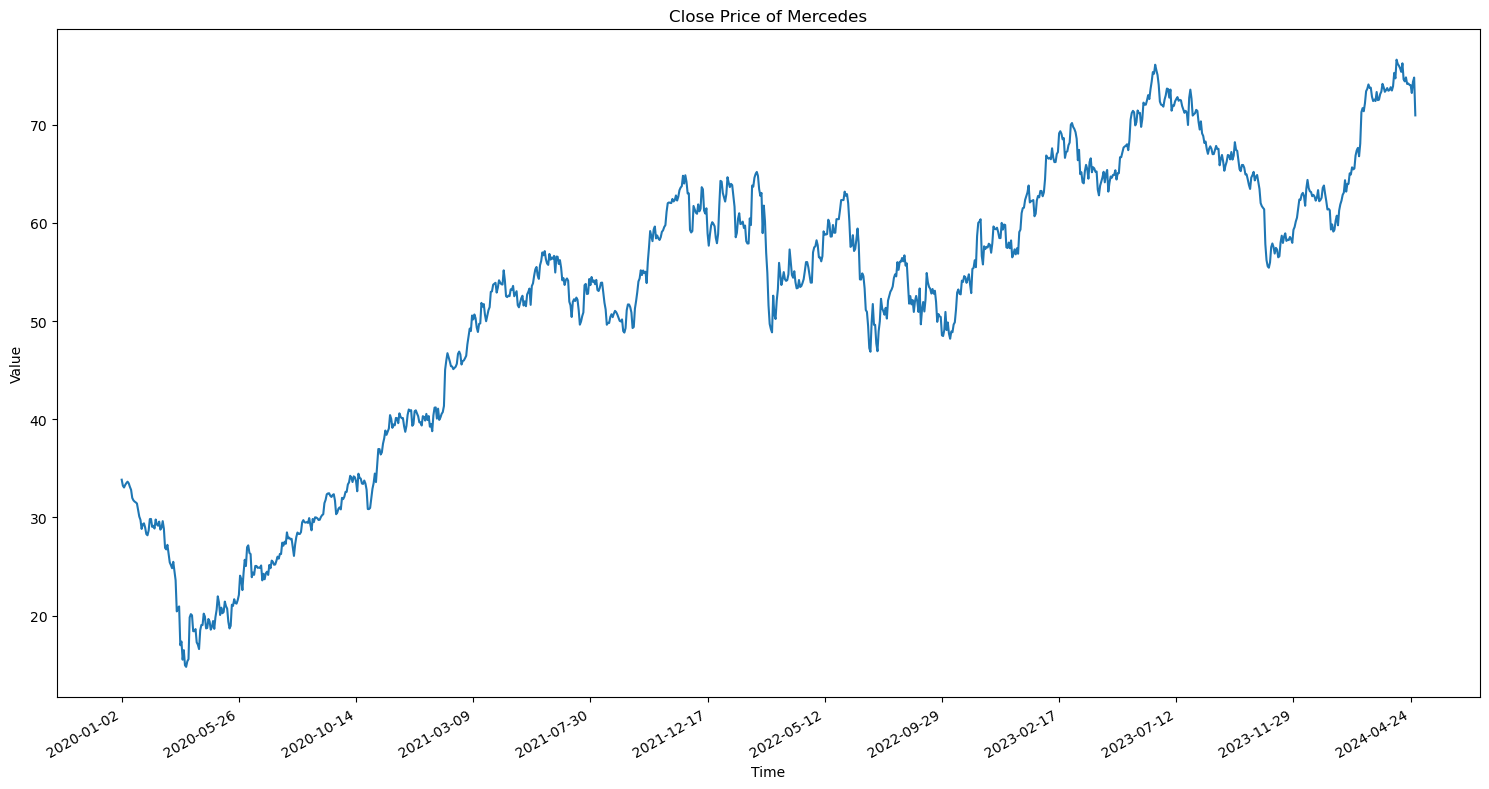

In [12]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Adj Close'], label='Adj Close')
ax.set_title('Close Price of Mercedes')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,1105,100))
pt.tight_layout()

From 2020 to 2021, the Mercedes stock increased significantly. After that, it has some ups and downs but it gradually increase overtime.

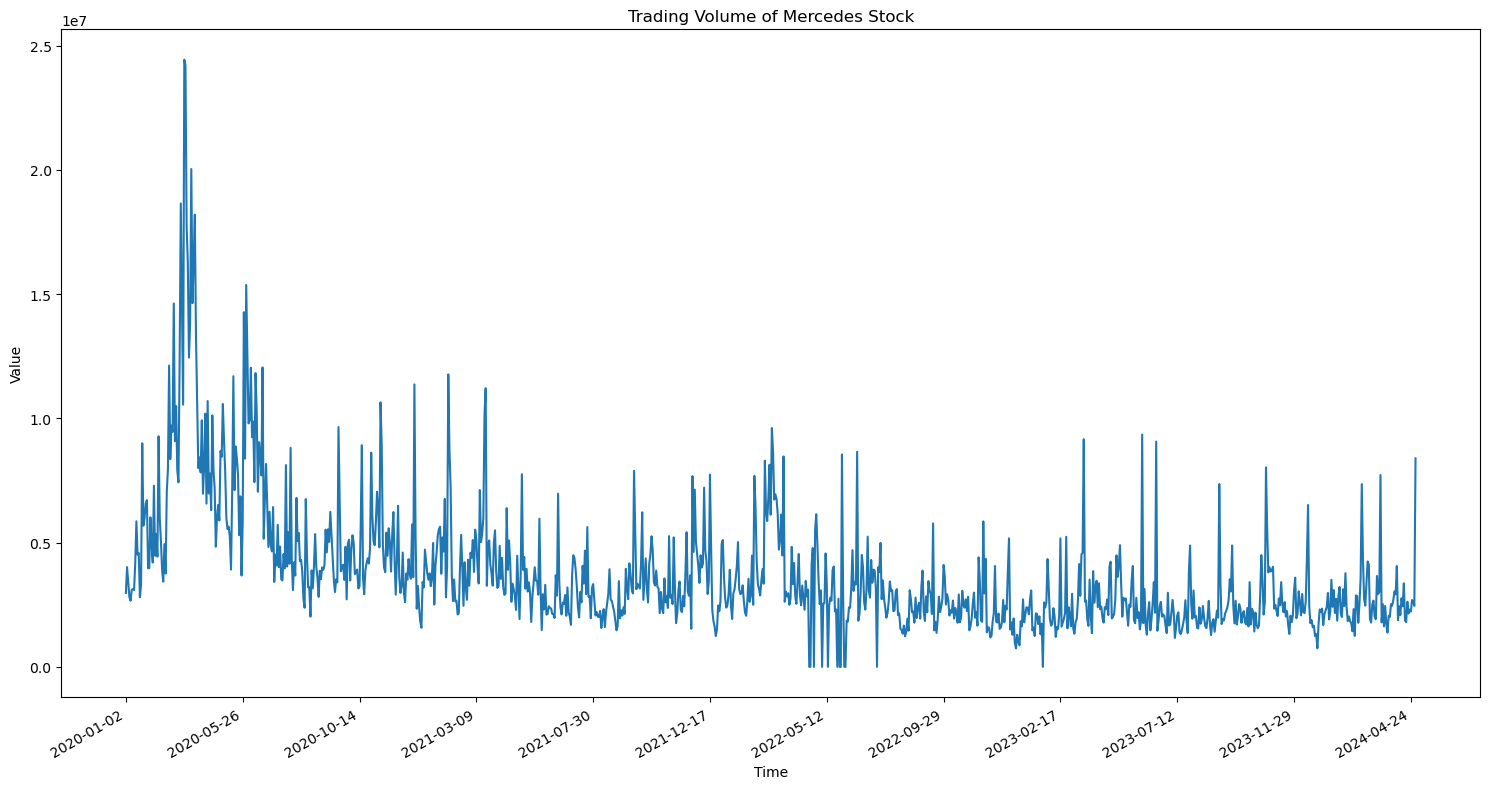

In [13]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Volume'], label='Volume')
ax.set_title('Trading Volume of Mercedes Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,1105,100))
pt.tight_layout()

R-Value:  0.8768957167048008
P-Value:  0.0
Std Err:  0.0006850912564318249


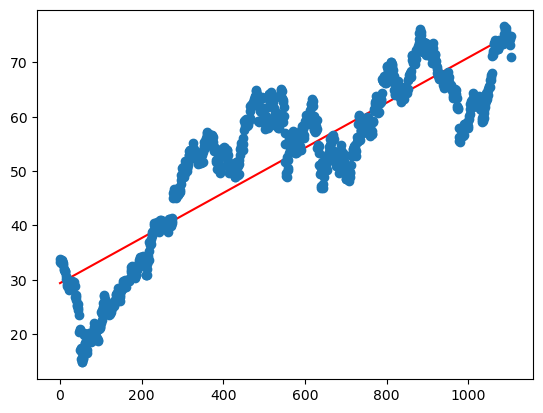

In [14]:
xi = np.arange(0,1105)
y = data['Adj Close']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The Mercedes adjusted closing price is linear with time

In [15]:
std_dev = data['Adj Close'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['Adj Close'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 15.105934835011071
 Mean: 52.302903101357465
 Coefficient Variance: 28.881637422185484 %


# Moving Average Window

In [16]:
data['Moving Average (20)'] = data['Adj Close'].rolling(window=20).mean()
data['Moving Average (100)'] = data['Adj Close'].rolling(window=100).mean()

In [17]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume,Moving Average (20),Moving Average (100)
Date,,,,,,,,
2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654,NaN,NaN
2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262,NaN,NaN
2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396,NaN,NaN
2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618,NaN,NaN
2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070,NaN,NaN
2020-01-09,41.504196,41.712135,41.292103,41.321213,33.646935,3098476,NaN,NaN
2020-01-10,41.466770,41.508358,41.050896,41.113277,33.477615,3130777,NaN,NaN
2020-01-13,41.254673,41.254673,40.356388,40.668293,33.115273,3089806,NaN,NaN
2020-01-14,40.643341,40.897022,40.148449,40.302322,32.817272,4170529,NaN,NaN


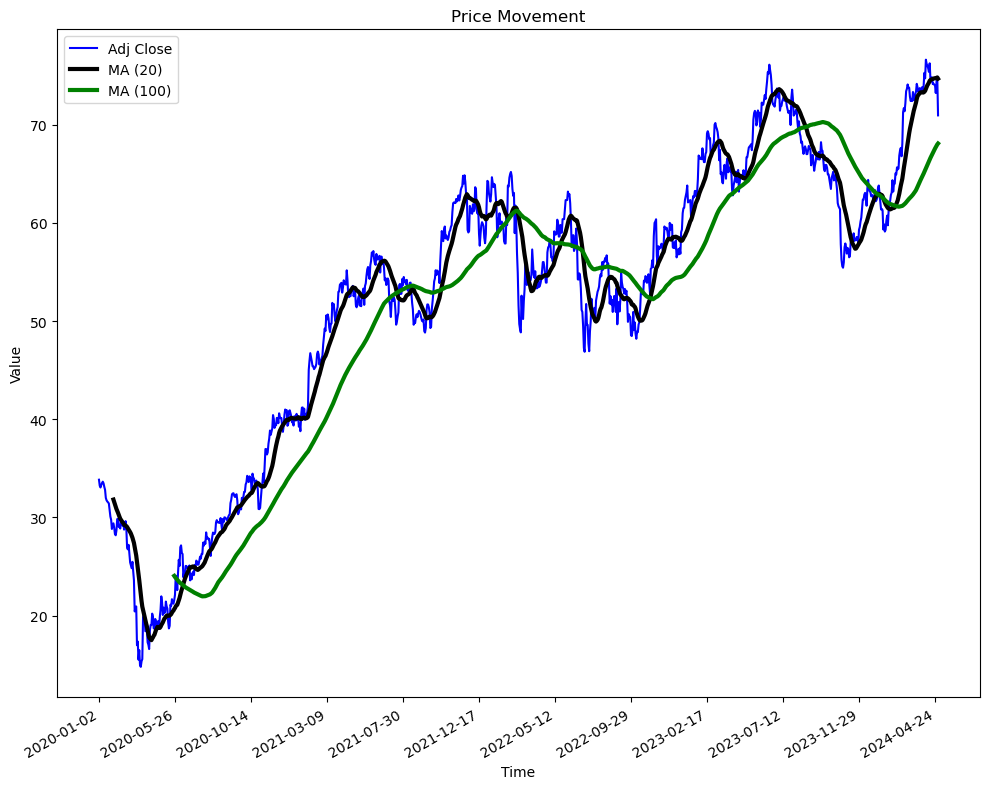

In [18]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], 'b-', label='Adj Close')
ax.plot(data['Moving Average (20)'], 'k-',label='MA (20)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,1105, 100))
fig.autofmt_xdate()
pt.tight_layout()

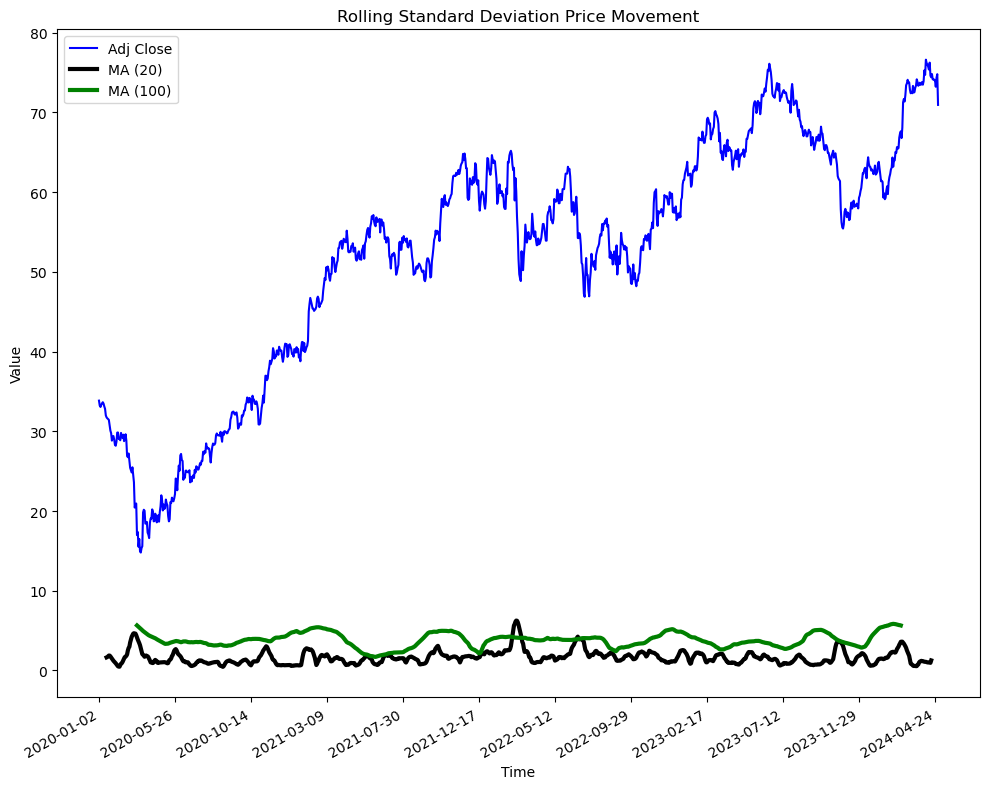

In [21]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], 'b-', label='Adj Close')
ax.plot(data['Adj Close'].rolling(window=20, center=True).std(), 'k-', label='MA (20)', linewidth=3)
ax.plot(data['Adj Close'].rolling(window=100, center=True).std(), 'g-',label='MA (100)', linewidth=3)
ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,1105, 100))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [22]:
data['Daily Return'] = data['Adj Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654,NaN,NaN,NaN
2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262,NaN,NaN,-0.018109
2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396,NaN,NaN,-0.005401
2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618,NaN,NaN,0.007991
2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070,NaN,NaN,0.005590


In [23]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2024-04-24,74.150002,74.440002,73.769997,74.019997,74.019997,2223226,74.7250,67.5604,-0.000405
2024-04-25,74.360001,74.360001,72.360001,73.220001,73.220001,2689932,74.7135,67.6968,-0.010808
2024-04-26,73.639999,74.790001,73.260002,74.360001,74.360001,2632815,74.7555,67.8390,0.015570
2024-04-29,75.000000,75.279999,74.519997,74.790001,74.790001,2456200,74.8045,67.9817,0.005783
2024-04-30,73.209999,73.790001,70.410004,70.940002,70.940002,8393648,74.6780,68.0766,-0.051477


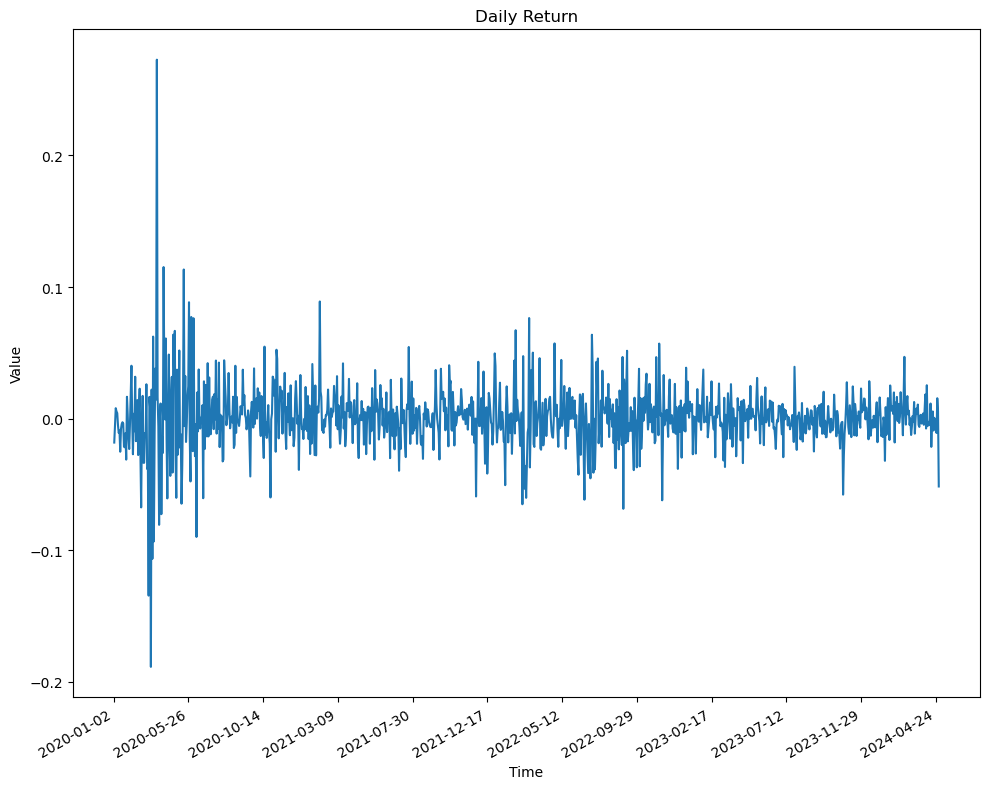

In [24]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,1105,100))
fig.autofmt_xdate()
pt.tight_layout()

# XGBoosting For Feature Importance

In [25]:
Features = ['Open', 'Low', 'High', 'Volume', 'Daily Return', 'Close']
target = ['Adj Close']

In [26]:
train = data.loc[data.index < '2023-04-30']
test = data.loc[data.index > '2023-04-30']

In [28]:
test.shape

(256, 9)

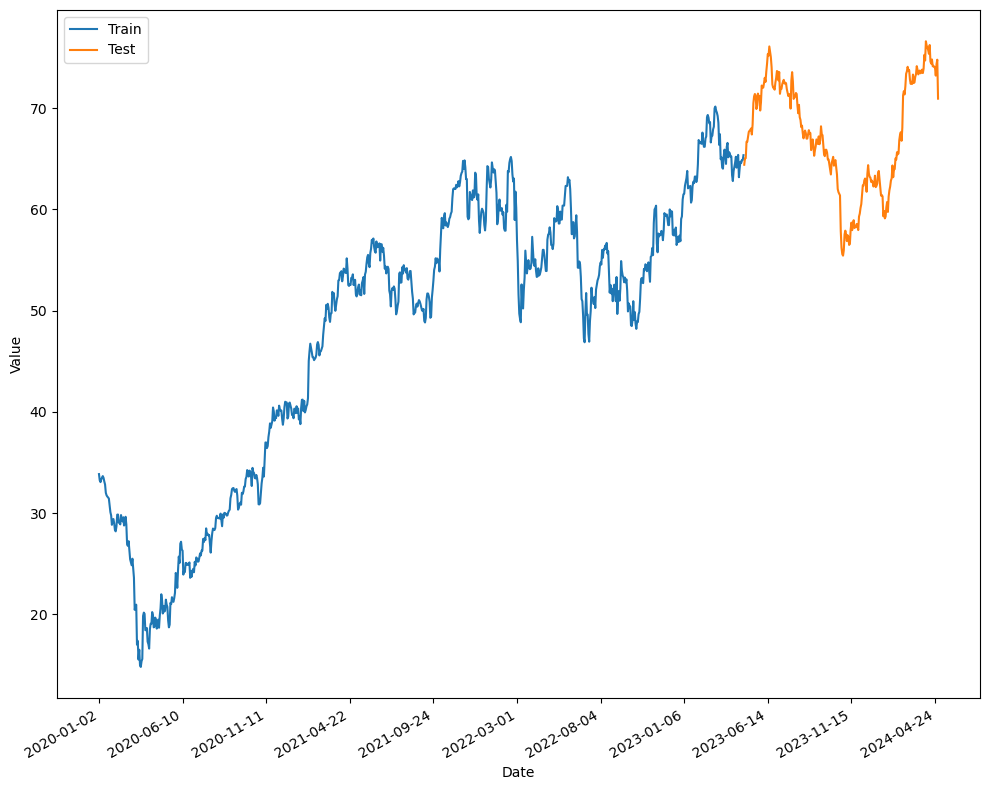

In [29]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(train[target], label='Train')
ax.plot(test[target], label='Test')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,1105,110))
fig.autofmt_xdate()
pt.tight_layout()

In [30]:
X_train = train[Features]
y_train = train[target]

X_test = test[Features]
y_test = test[target]

In [46]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.02)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:13.80682	validation_1-rmse:20.14633
[100]	validation_0-rmse:2.28111	validation_1-rmse:9.23253
[200]	validation_0-rmse:0.96594	validation_1-rmse:7.73890
[300]	validation_0-rmse:0.75512	validation_1-rmse:7.55865
[400]	validation_0-rmse:0.63005	validation_1-rmse:7.54988
[476]	validation_0-rmse:0.56282	validation_1-rmse:7.55112


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
feature_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['Importances'])

<Axes: title={'center': 'Feature Importance'}>

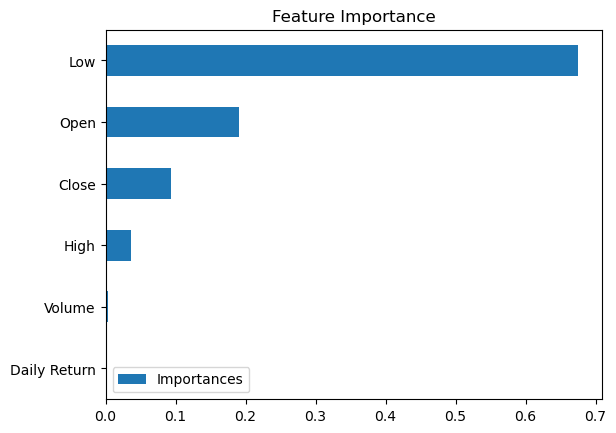

In [48]:
feature_importance.sort_values('Importances').plot(kind='barh', title='Feature Importance')

In [49]:
feature_importance

,Importances
Open,0.191044
Low,0.674924
High,0.035958
Volume,0.002976
Daily Return,0.001776
Close,0.093322


Only the lowest price of the day is significant to our Closing Price

# Stationary Check

In [50]:
adf_results = adfuller(data['Adj Close'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: -1.0753150464291419
 P-Value: 0.7248149345161593


In [51]:
adf_results = adfuller(np.diff(data['Adj Close'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -32.207507798499044
 P-Value: 0.0
 The time series is stationary


In [52]:
data_diff = np.diff(data['Adj Close'], n=1)

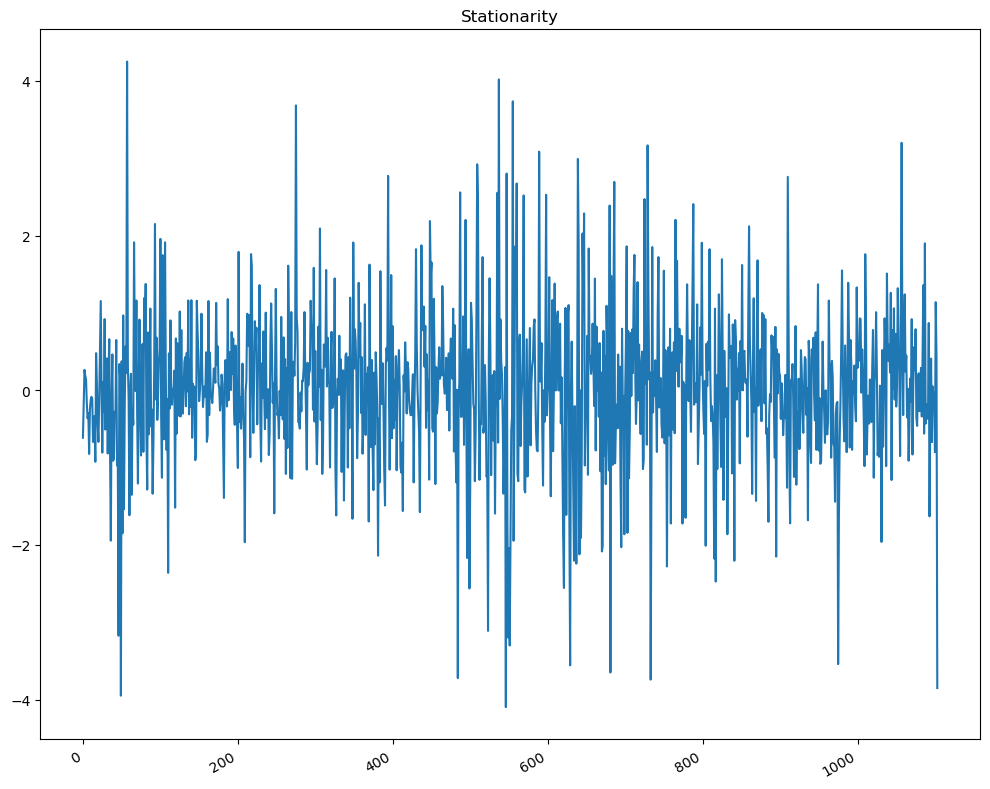

In [53]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

First-Order integration. The mean is constant and the variance is constant as well. No presence of trend

<function plot_acf at 0x000001AC9939B7F0>


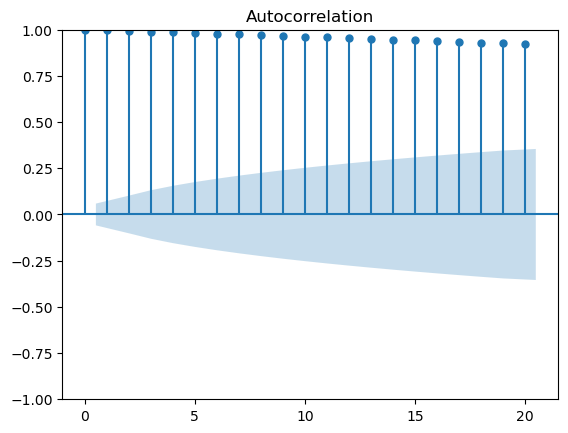

In [54]:
plot_acf(data['Adj Close'], lags=20)
print(plot_acf)

<function plot_pacf at 0x000001AC9939B6D0>


C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


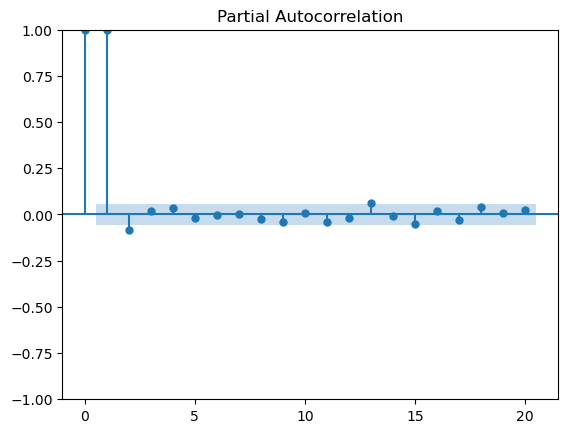

In [55]:
plot_pacf(data['Adj Close'], lags=20)
print(plot_pacf)

# Data Preprocessing

In [59]:
copy_data = data.copy()

In [60]:
copy_data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average (20),Moving Average (100),Daily Return
Date,,,,,,,,,
2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654,NaN,NaN,NaN
2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262,NaN,NaN,-0.018109
2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396,NaN,NaN,-0.005401
2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618,NaN,NaN,0.007991
2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070,NaN,NaN,0.005590


In [61]:
copy_data.drop([ 
           'Open',
           'High',
           'Close',
           'Volume',
           'Moving Average (20)', 
           'Moving Average (100)', 
           'Daily Return'], axis=1)

,Low,Adj Close
Date,,
2020-01-02,40.971882,33.846729
2020-01-03,40.302322,33.233799
2020-01-06,39.703465,33.054317
2020-01-07,40.680767,33.318455
2020-01-08,40.489468,33.504704
...,...,...
2024-04-24,73.769997,74.019997
2024-04-25,72.360001,73.220001
2024-04-26,73.260002,74.360001


In [62]:
scaler = StandardScaler()
scaler.fit(copy_data)
copy_data = scaler.transform(copy_data)

In [63]:
copy_data

array([[-1.1504216 , -1.14330851, -1.11212818, ...,         nan,
                nan,         nan],
       [-1.13622132, -1.17686636, -1.15893985, ...,         nan,
                nan, -0.799218  ],
       [-1.2124394 , -1.2303854 , -1.20080839, ...,         nan,
                nan, -0.2663802 ],
       ...,
       [ 1.11766362,  1.14840803,  1.14526592, ...,  1.51129468,
         1.12340715,  0.61285416],
       [ 1.21243578,  1.18249344,  1.23335731, ...,  1.51458988,
         1.13395338,  0.20251168],
       [ 1.08769892,  1.07884569,  0.94601094, ...,  1.50608291,
         1.14096695, -2.19829099]])

In [64]:
imputer = SimpleImputer(strategy='mean')
copy_data = imputer.fit_transform(copy_data)

In [65]:
copy_data

array([[-1.15042160e+00, -1.14330851e+00, -1.11212818e+00, ...,
         1.57026019e-16,  2.82521963e-16, -7.24058494e-18],
       [-1.13622132e+00, -1.17686636e+00, -1.15893985e+00, ...,
         1.57026019e-16,  2.82521963e-16, -7.99217997e-01],
       [-1.21243940e+00, -1.23038540e+00, -1.20080839e+00, ...,
         1.57026019e-16,  2.82521963e-16, -2.66380203e-01],
       ...,
       [ 1.11766362e+00,  1.14840803e+00,  1.14526592e+00, ...,
         1.51129468e+00,  1.12340715e+00,  6.12854161e-01],
       [ 1.21243578e+00,  1.18249344e+00,  1.23335731e+00, ...,
         1.51458988e+00,  1.13395338e+00,  2.02511683e-01],
       [ 1.08769892e+00,  1.07884569e+00,  9.46010943e-01, ...,
         1.50608291e+00,  1.14096695e+00, -2.19829099e+00]])

In [66]:
pca = PCA(n_components=1)
copy_data = pca.fit_transform(copy_data)

In [67]:
copy_data

array([[ 2.10795738],
       [ 2.26289496],
       [ 2.28704146],
       ...,
       [-3.27396709],
       [-3.40177182],
       [-2.45532559]])

# Model Selection

In [68]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [69]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 1

arima_list = list(product(ps,qs))

In [71]:
train = copy_data[:-256]
test = copy_data[-256:]

In [72]:
train.shape

(849, 1)

In [73]:
test.shape

(256, 1)

In [74]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Andrew\AppData\Local\Temp\ipykernel_1300\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

,"(p,q)",AIC
0,"(8, 6)",-118.637812
1,"(6, 8)",-118.426900
2,"(6, 7)",-116.924527
3,"(7, 6)",-116.822851
4,"(8, 7)",-116.131502
...,...,...
95,"(6, 1)",-96.266450
96,"(0, 7)",-96.019488
97,"(1, 6)",-95.546791
98,"(1, 7)",-94.353461


The best model here is ARIMA(8,1,6). I will limit the orders to a smaller range to compare its performance later.

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


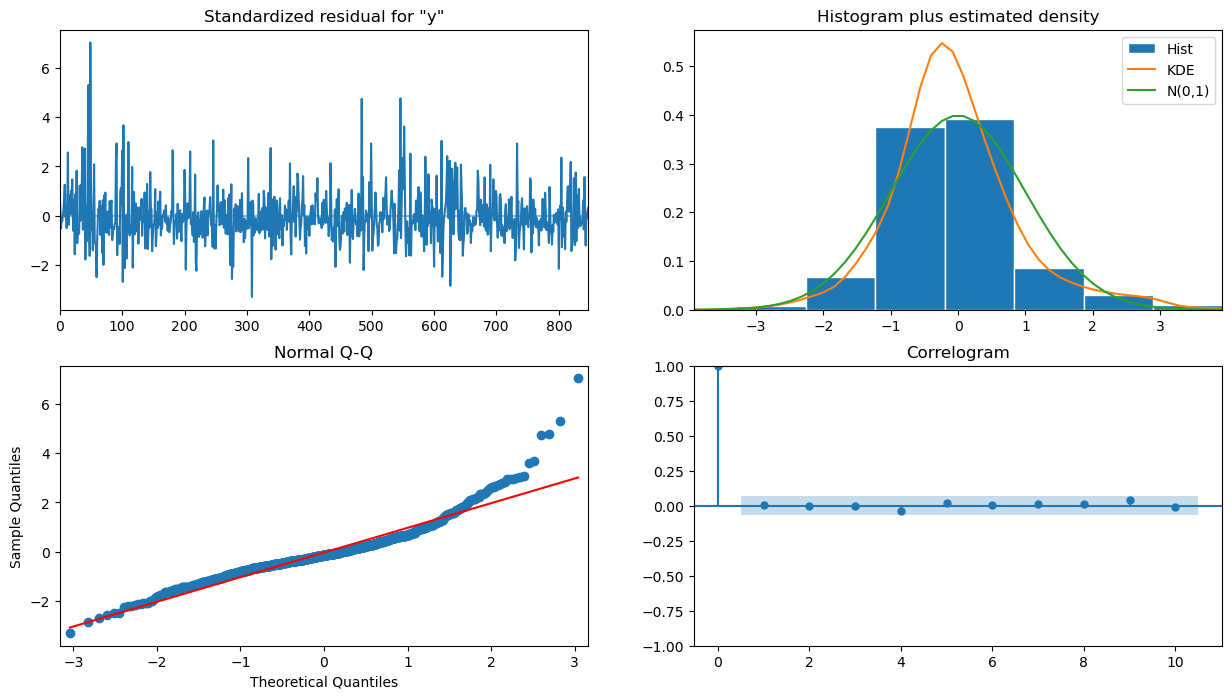

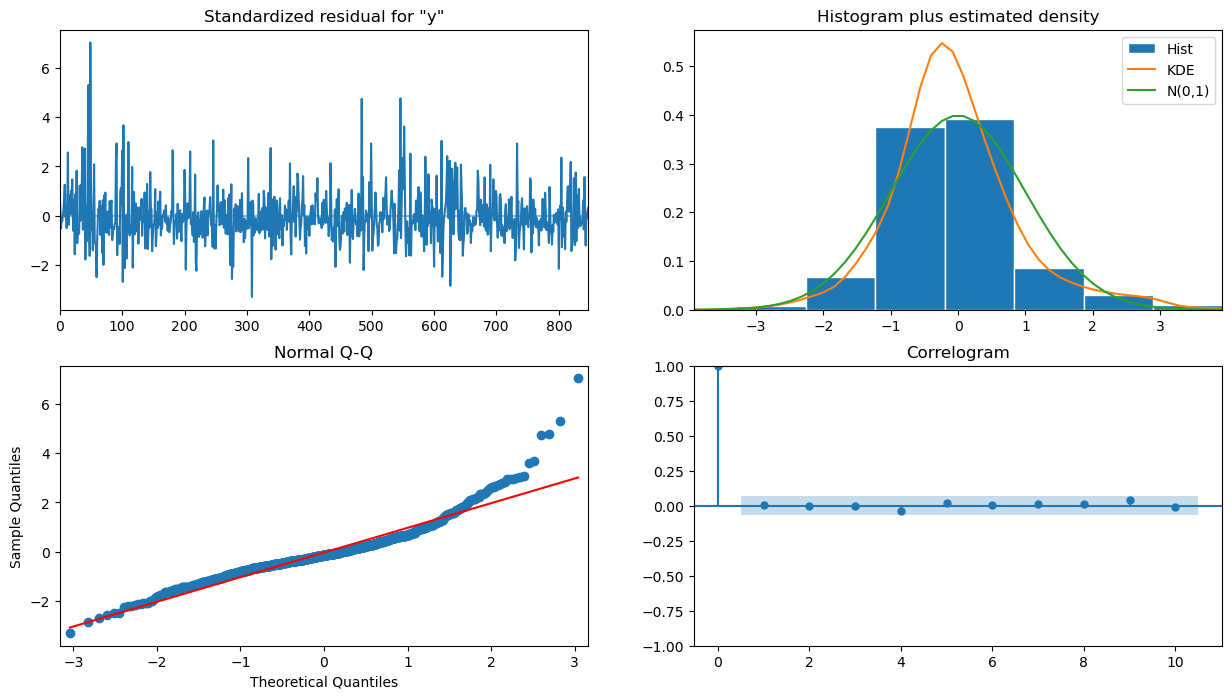

In [75]:
arima_model = SARIMAX(train, order=(8,1,6), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [76]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

     lb_stat  lb_pvalue
1   0.124663   0.724031
2   0.128845   0.937609
3   0.164496   0.983106
4   1.153267   0.885731
5   1.349970   0.929707
6   1.379005   0.967123
7   1.493215   0.982544
8   1.733367   0.988124
9   4.030646   0.909384
10  4.093414   0.943035
11  4.329321   0.959275
12  5.397310   0.943376
13  6.299261   0.934580
14  6.312381   0.957993
15  6.444181   0.971283
16  6.517810   0.981475
17  6.519274   0.988961
18  6.524579   0.993560
19  6.528634   0.996334


The ARIMA Model (3,1,1) seems fairly good, the residuals are correlated to white noise.

The ARIMA Model (3,1,6) seems fairly good as well.

# Forecasting

In [77]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(8, 1, 6))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

In [78]:
copy_data

array([[ 2.10795738],
       [ 2.26289496],
       [ 2.28704146],
       ...,
       [-3.27396709],
       [-3.40177182],
       [-2.45532559]])

# Predicting the next year stock prices of Mercedes Stock - From 2023-4-30 to 2024-4-30

In [79]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_arima = rolling_forecast(copy_data, TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Andrew\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

In [80]:
predicted_data = pd.DataFrame({'Actual Data': data['Close'][-256:]})
predicted_data.head()

,Actual Data
Date,
2023-05-02,69.559998
2023-05-03,70.250000
2023-05-04,65.059998
2023-05-05,66.680000
2023-05-08,66.680000


In [81]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
Date,,
2023-05-02,69.559998,-2.207149
2023-05-03,70.250000,-2.207863
2023-05-04,65.059998,-2.142662
2023-05-05,66.680000,-1.714502
2023-05-08,66.680000,-1.809391


In [82]:
pred_arima = np.array(pred_arima)
pred_arima = pred_arima.reshape(-1,1)

In [83]:
pred_arima = np.dot(pred_arima, pca.components_)
pred_arima = scaler.inverse_transform(pred_arima)

In [84]:
pred_arima

array([[6.96482512e+01, 7.03313410e+01, 6.88980331e+01, ...,
        6.44715480e+01, 6.08721907e+01, 6.73192542e-04],
       [6.96521438e+01, 7.03352346e+01, 6.89019167e+01, ...,
        6.44754865e+01, 6.08748512e+01, 6.73102231e-04],
       [6.92962676e+01, 6.99792575e+01, 6.85468644e+01, ...,
        6.41154076e+01, 6.06316156e+01, 6.81358833e-04],
       ...,
       [7.50300810e+01, 7.57146985e+01, 7.42674046e+01, ...,
        6.99169348e+01, 6.45505850e+01, 5.48329925e-04],
       [7.54875843e+01, 7.61723316e+01, 7.47238488e+01, ...,
        7.03798409e+01, 6.48632811e+01, 5.37715495e-04],
       [7.61050498e+01, 7.67899724e+01, 7.53398849e+01, ...,
        7.10045984e+01, 6.52853089e+01, 5.23389817e-04]])

In [85]:
predicted_data['Predicted Data'] = pred_arima

In [86]:
predicted_data.head(20)

,Actual Data,Predicted Data
Date,,
2023-05-02,69.559998,69.648251
2023-05-03,70.250000,69.652144
2023-05-04,65.059998,69.296268
2023-05-05,66.680000,66.959305
2023-05-08,66.680000,67.477225
2023-05-09,67.150002,69.059592
2023-05-10,67.660004,68.158285
2023-05-11,67.769997,68.894361
2023-05-12,67.860001,68.975196


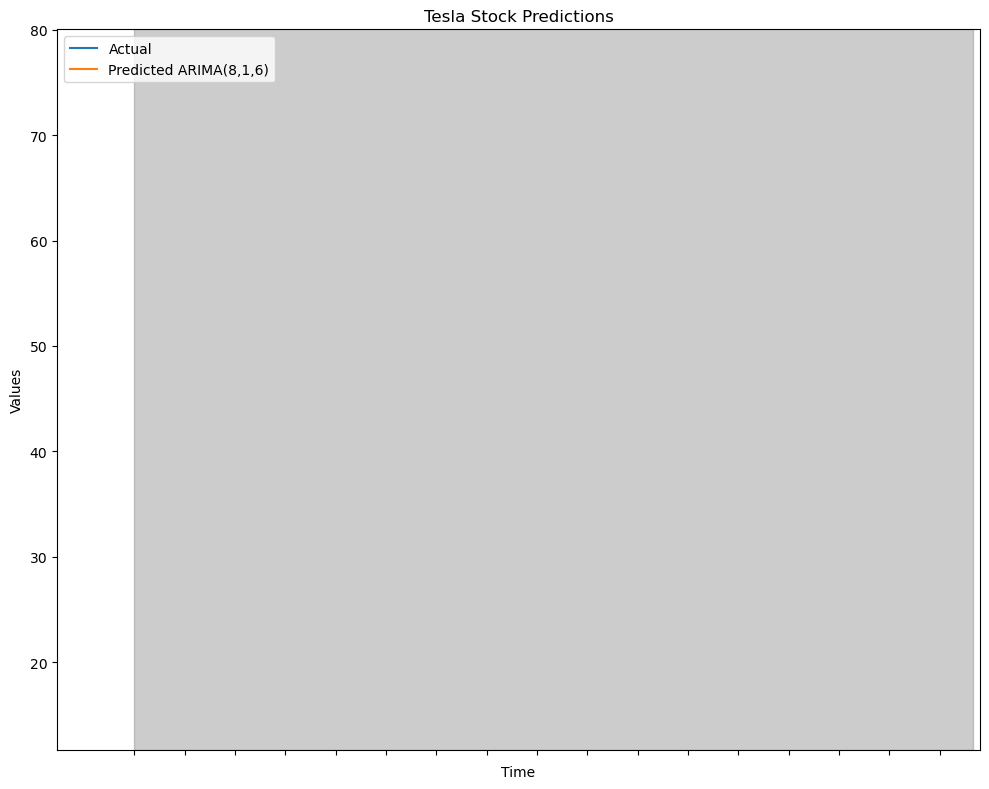

In [87]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(8,1,6)')
ax.set_title('Tesla Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(2000, 2275)
ax.axvspan(2023, 2273, color="#808080", alpha=0.4)
pt.xticks(np.arange(2023, 2273,15))
fig.autofmt_xdate()
pt.tight_layout()

In [132]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2446478.7947416073


In [133]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1558.6847530917516


In [134]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 27512.540256833774


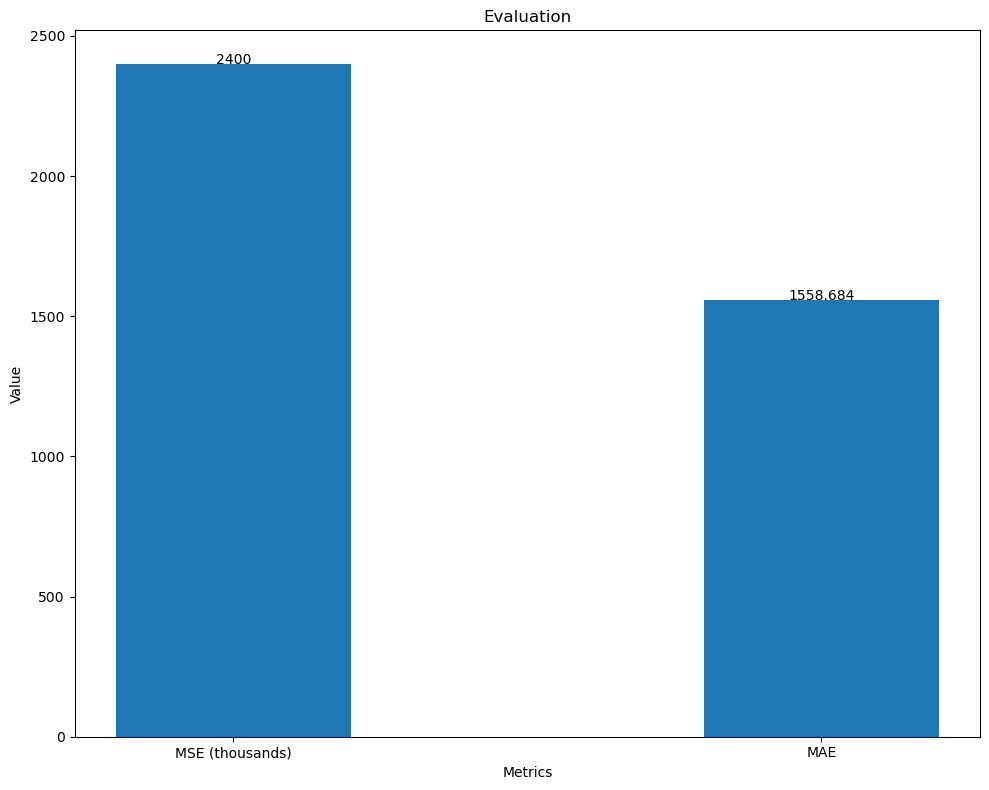

In [136]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE (thousands)', 'MAE']
y = [2400, 1558.684]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

The performance of this model is poor. This might due to 2 reasons:
- The time series has very high volatility as we can see from the data whereas ARIMA could not predict well
- Scaling and PCA-ing our data caused this to happen because we fill in the missing values with mean in SimpleImputer

Let's try predicting without doing any feature engineering 